In [1]:
from pyspark.sql import SparkSession

# สร้าง SparkSession ใหม่
spark = (
    SparkSession.builder
        # กำหนดชื่อแอปพลิเคชัน
        .appName("Social Commerce")
        # กำหนด URL ของ Spark master
        .master("spark://spark-master:7077")
        # กำหนดจำนวน memory ที่ executor จะใช้
        .config("spark.executor.memory", "1000m")
        # กำหนดจำนวน cores ที่ executor จะใช้
        .config("spark.executor.cores", "2")
        # กำหนดจำนวน cores สูงสุดที่ Spark จะใช้
        .config("spark.cores.max", "6")
        # สร้าง SparkSession ถ้ายังไม่มี, ถ้ามีแล้วจะใช้ SparkSession ที่มีอยู่
        .getOrCreate()
)

23/05/22 14:36:27 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [2]:
# ใช้ SparkSession ที่เราสร้างขึ้น (spark) ในการอ่านข้อมูล

raw_df = (
    spark.read  # ใช้วิธีการอ่านข้อมูล (read method)
        .format("csv")  # กำหนดรูปแบบของไฟล์ที่จะอ่านเป็น CSV
        .option("header", "true")  # กำหนดว่าไฟล์ CSV มี header ที่บรรทัดแรก
        .option("inferSchema","true")  # อนุญาตให้ Spark ทำการสืบความหมายของ schema จากข้อมูล
        .load("000000000000")  # โหลดข้อมูลจากไฟล์ที่ชื่อ "000000000000"
)

In [3]:
# printSchema เป็นฟังก์ชันที่ใช้แสดง schema ของ DataFrame
# Schema คือโครงสร้างของ DataFrame ซึ่งประกอบด้วยชื่อคอลัมน์ ชนิดข้อมูล และคุณสมบัติอื่นๆ
# การใช้ printSchema ช่วยให้เราเข้าใจโครงสร้างข้อมูลของเรา

raw_df.printSchema()

root
 |-- source: string (nullable = true)
 |-- isTrueDirect: boolean (nullable = true)
 |-- sourceKeyword: string (nullable = true)
 |-- medium: string (nullable = true)
 |-- isVideoAd: boolean (nullable = true)
 |-- fullVisitorId: long (nullable = true)
 |-- visitId: integer (nullable = true)
 |-- date: integer (nullable = true)
 |-- newVisits: integer (nullable = true)
 |-- hitReferer: string (nullable = true)
 |-- hitType: string (nullable = true)
 |-- hitAction_type: integer (nullable = true)
 |-- hitNumber: integer (nullable = true)
 |-- hitHour: integer (nullable = true)
 |-- hitMin: integer (nullable = true)
 |-- timeMicroSec: integer (nullable = true)
 |-- v2ProductName: string (nullable = true)
 |-- productListName: string (nullable = true)
 |-- isClick: boolean (nullable = true)
 |-- isImpression: boolean (nullable = true)
 |-- sessionQualityDim: integer (nullable = true)
 |-- timeOnScreen: string (nullable = true)
 |-- timeOnSite: integer (nullable = true)
 |-- totalTransac

In [4]:
# count เป็นฟังก์ชันที่ใช้ในการนับจำนวนแถวใน DataFrame
# ใช้สำหรับการตรวจสอบขนาดของ DataFrame ซึ่งสามารถช่วยเราเข้าใจจำนวนข้อมูลที่ต้องจัดการ

raw_df.count()


917814

In [5]:
# describe เป็นฟังก์ชันที่ใช้สร้างสถิติของ DataFrame
# สถิติที่สร้างขึ้นจะมีการนับ (count), ค่าเฉลี่ย (mean), ค่าส่วนเบี่ยงเบนมาตรฐาน (stddev), ค่าต่ำสุด (min), และค่าสูงสุด (max) ของแต่ละคอลัมน์
# toPandas เป็นฟังก์ชันที่ใช้แปลง Spark DataFrame เป็น Pandas DataFrame
# transpose เป็นฟังก์ชันของ Pandas ที่ใช้สลับแถวเป็นคอลัมน์และคอลัมน์เป็นแถว
# การ transpose มักจะใช้เพื่อทำให้ข้อมูลง่ายต่อการมองเห็น

raw_df.describe().toPandas().transpose()


,0,1,2,3,4
summary,count,mean,stddev,min,max
source,917814,None,None,(direct),youtube.com
sourceKeyword,322031,None,None,(Remarketing/Content targeting),yyoutubr
medium,917814,None,None,(none),referral
fullVisitorId,917814,4.7679506549928141E18,1.42707561410277811E18,514359656957582,5487531102128447544
visitId,917814,1.4828991660307045E9,9692290.975135246,1470037326,1501656575
date,917814,2.0165139267192483E7,4699.035428253388,20160801,20170801
newVisits,647359,1.0,0.0,1,1
hitReferer,119959,None,None,http://googleads.g.doubleclick.net/pagead/ads?...,https://youtube.com/yt/about/copyright/
hitType,917814,None,None,EVENT,PAGE


(1) Missing Value

การขาดหายของข้อมูล (Missing Value) คือความผิดปกติที่สำคัญที่สุดในข้อมูลของเรา. count ใน describe() บอกเราว่ามีข้อมูลทั้งหมดกี่รายการในแต่ละคอลัมน์. เราสามารถเปรียบเทียบค่า count นี้กับจำนวนรายการทั้งหมดที่คาดว่าจะมีในข้อมูล. หาก count ต่ำกว่าที่คาดความหายของข้อมูลจะเป็นปัญหาที่เราต้องจัดการ.

(2) Outlier

ค่าผิดปกติ (Outliers) เป็นจุดข้อมูลที่มีค่าต่างจากส่วนใหญ่ของข้อมูล. min และ max ใน describe() จะบอกเราว่าข้อมูลเริ่มที่ค่าเท่าไรและลุกลามถึงค่าเท่าไร หากมีค่า min หรือ max ที่ผิดปกติ (เช่น ค่าที่สูงหรือต่ำมากเกินไป) เราอาจต้องสงสัยว่ามีข้อมูลผิดปกติ.

(3) Dispersion

ค่าการกระจาย (Dispersion) บอกเราว่าข้อมูลกระจายอย่างไร. stddev ใน describe() บอกเราว่าข้อมูลมีการกระจายมากเท่าไร หาก stddev สูง ข้อมูลจะมีการกระจายมาก หาก stddev ต่ำ ข้อมูลจะมีการกระจายน้อย.

(4) Difference Scale

ค่าสเกลต่างกัน (Difference Scale) หมายถึงความแตกต่างในการวัดข้อมูลระหว่างคอลัมน์ต่างๆ mean ใน describe() บอกเราว่าข้อมูลมีค่าเฉลี่ยเท่าไร โดยเราสามารถใช้เพื่อเปรียบเทียบค่าเฉลี่ยของคอลัมน์ต่างๆ เราสามารถปรับสเกลของข้อมูลในคอลัมน์ให้สอดคล้องกันโดยใช้การปรับสเกล (scaling) เช่น min-max scaling หรือ standard scaling.

In [6]:
# Importing required data types from PySpark
from pyspark.sql.types import IntegerType, FloatType, LongType, StringType

# Initializing empty lists for numeric and non-numeric columns
numeric_columns = []
non_numeric_columns = []

# Looping through each column in the DataFrame
for col_name in raw_df.columns:
    # Checking if the column data type is numeric (IntegerType, FloatType, or LongType)
    if isinstance(raw_df.schema[col_name].dataType, (IntegerType, FloatType, LongType)):
        # If it is numeric, then add the column name to the numeric_columns list
        numeric_columns.append(col_name)
    else:
        # If it's not numeric, then add the column name to the non_numeric_columns list
        non_numeric_columns.append(col_name)

# Printing the list of numeric columns
print(f"Numeric columns: {numeric_columns}")

# Printing the list of non-numeric columns
print(f"Non-numeric columns: {non_numeric_columns}")


Numeric columns: ['fullVisitorId', 'visitId', 'date', 'newVisits', 'hitAction_type', 'hitNumber', 'hitHour', 'hitMin', 'timeMicroSec', 'sessionQualityDim', 'timeOnSite', 'totalTransactionRevenue']
Non-numeric columns: ['source', 'isTrueDirect', 'sourceKeyword', 'medium', 'isVideoAd', 'hitReferer', 'hitType', 'v2ProductName', 'productListName', 'isClick', 'isImpression', 'timeOnScreen']


In [7]:
from pyspark.sql.functions import col, expr

# Loop through every numeric column
for col_name in numeric_columns:
    # Calculate IQR
    bounds = raw_df.approxQuantile(col_name, [0.25, 0.75], 0.05)
    IQR = bounds[1] - bounds[0]

    # Calculate lower and upper bounds
    lower_bound = bounds[0] - 1.5 * IQR
    upper_bound = bounds[1] + 1.5 * IQR

    # Find outliers
    outliers = raw_df.filter((col(col_name) < lower_bound) | (col(col_name) > upper_bound))

    # Print only the column name, the count of outliers and the outlier range
    print(f"Column: {col_name}")
    print(f"Outlier count: {outliers.count()}")
    print(f"Outlier range: < {lower_bound} OR > {upper_bound}\n")


Column: fullVisitorId


Outlier count: 90805
Outlier range: < 4.636851387992723e+18 OR > 5.801489678900736e+18



Column: visitId


Outlier count: 0
Outlier range: < 1448245415.5 OR > 1516209107.5



Column: date


Outlier count: 0
Outlier range: < 20146788.0 OR > 20184452.0



Column: newVisits


Outlier count: 0
Outlier range: < 1.0 OR > 1.0



Column: hitAction_type


Outlier count: 63911
Outlier range: < 0.0 OR > 0.0



Column: hitNumber


Outlier count: 107855
Outlier range: < -10.5 OR > 25.5



Column: hitHour


Outlier count: 0
Outlier range: < -3.0 OR > 29.0



Column: hitMin


Outlier count: 0
Outlier range: < -27.0 OR > 85.0



Column: timeMicroSec


Outlier count: 108522
Outlier range: < -361549.0 OR > 657971.0



Column: sessionQualityDim


Outlier count: 12166
Outlier range: < -26.0 OR > 46.0



Column: timeOnSite


Outlier count: 70879
Outlier range: < -877.0 OR > 1795.0



Column: totalTransactionRevenue


Outlier count: 8730
Outlier range: < -122395000.0 OR > 308845000.0



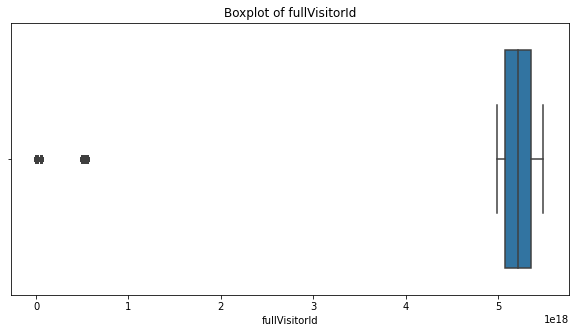

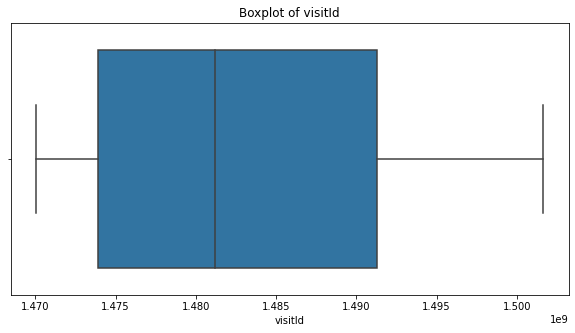

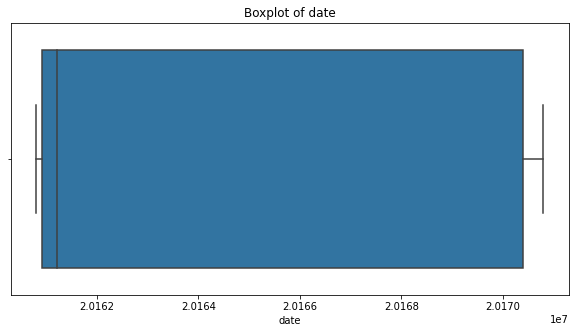

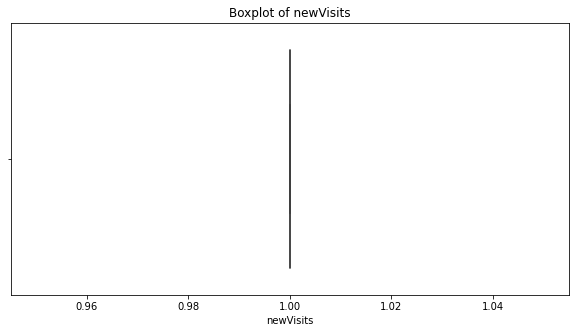

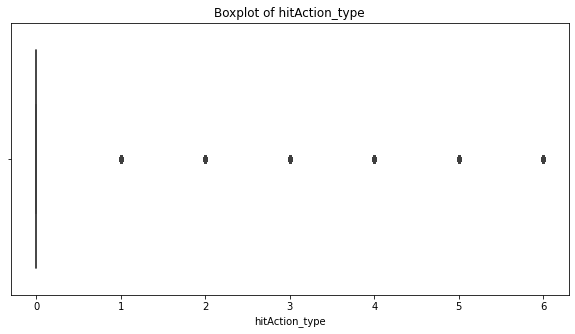

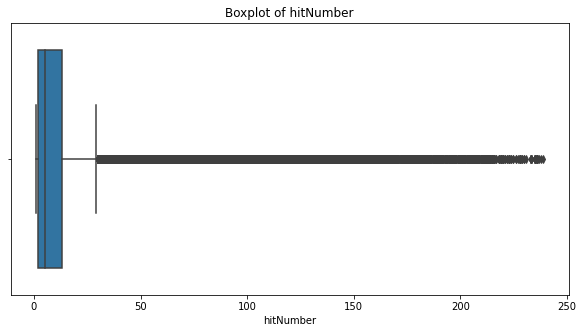

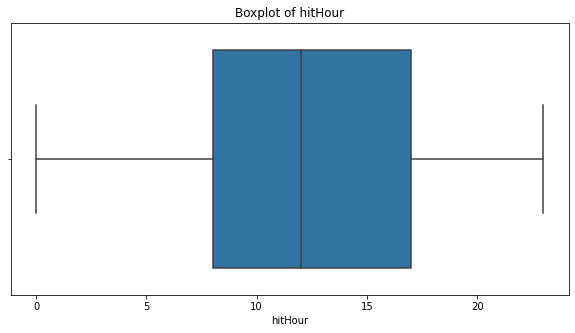

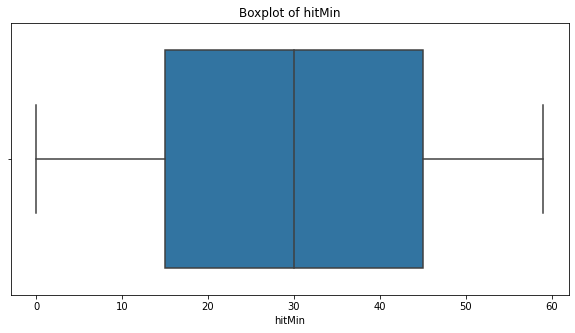

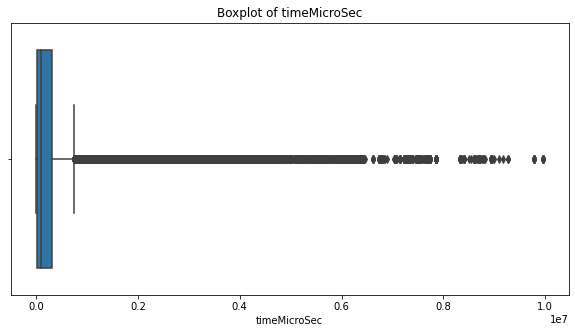

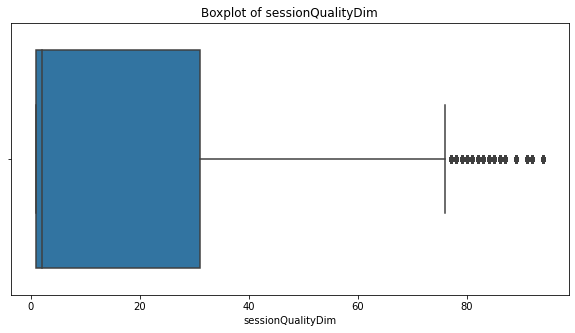

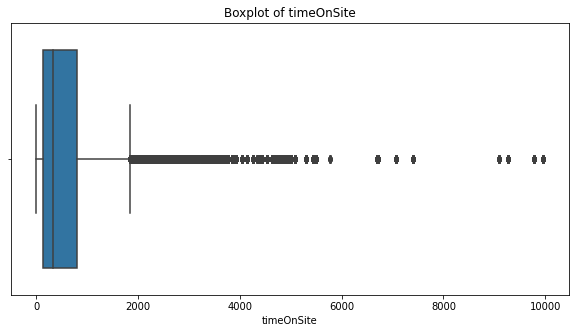

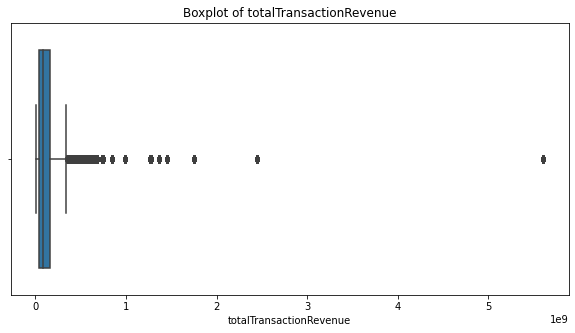

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert your PySpark DataFrame to Pandas
pandas_df = raw_df.toPandas()

# Loop through every numeric column
for col_name in numeric_columns:
    plt.figure(figsize=(10, 5))  # Increase the size of the plot
    sns.boxplot(x=pandas_df[col_name])  # Seaborn box plot
    plt.title(f'Boxplot of {col_name}')  # Adding a title
    plt.show()  # Display the plot


In [9]:
from pyspark.sql.functions import col

# ลบแถวที่มีค่า 'timeOnSite' น้อยกว่า -877 หรือมากกว่า 1795
cleaned_df = raw_df.filter((col("timeOnSite") >= -877) & (col("timeOnSite") <= 1795))


In [10]:
cleaned_df.count()

779630

In [11]:
raw_df.count()

917814

In [12]:
cleaned_df.select('timeOnsite').describe().show()

+-------+------------------+
|summary|        timeOnsite|
+-------+------------------+
|  count|            779630|
|   mean|444.31880507420186|
| stddev|429.85563114394535|
|    min|                 1|
|    max|              1794|
+-------+------------------+

